<a href="https://colab.research.google.com/github/yaminigangu/XAI_lab_pratical/blob/main/Exp_AI_Lab_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

1. Fit a simple linear regression model
2. Interpret the coefficients of the model:     
  . What does the slope tell you about the change in car sales for eac
    additional TV ad?      
  . What does the intercept represent in this context?

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
data = pd.read_excel(r"/content/Car_Sales.xlsx")
print(data.columns)
X = data[["Number of TV Ads (x)"]]
y = data["Number of Cars Sold (y)"]
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"Equation of the linear model: y = {slope:.2f}x + {intercept:.2f}")

Index(['Number of TV Ads (x)', 'Number of Cars Sold (y)'], dtype='object')
Slope: 5.00
Intercept: 10.00
Equation of the linear model: y = 5.00x + 10.00


3. Make a prediction using your model

In [ ]:
prediction = model.predict([[10]])
print(f"Predicted cars sold when 10 TV ads aired: {prediction[0]:.2f}")

Predicted cars sold when 10 TV ads aired: 60.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


4. Apply SHAP (SHapley Additive exPlanations)

In [ ]:
import shap
explainer = shap.Explainer(model, X)
shap_values= explainer(X)
shap_values

.values =
array([[-5.],
       [ 5.],
       [ 0.],
       [-5.],
       [ 5.]])

.base_values =
array([20., 20., 20., 20., 20.])

.data =
array([[1],
       [3],
       [2],
       [1],
       [3]])

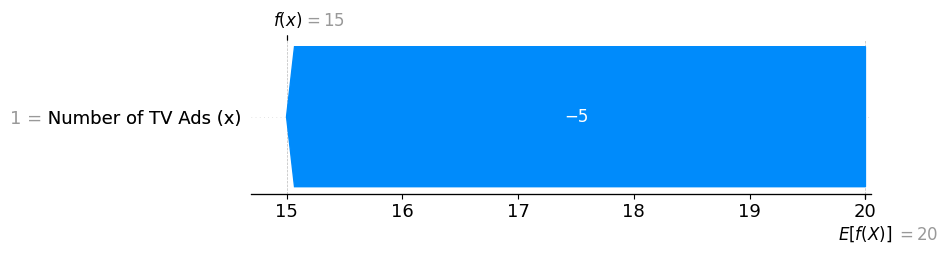

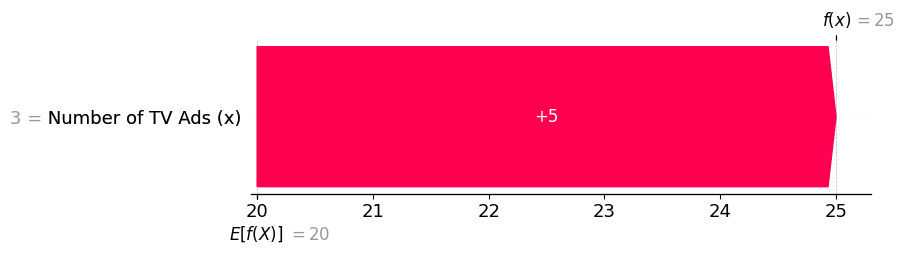

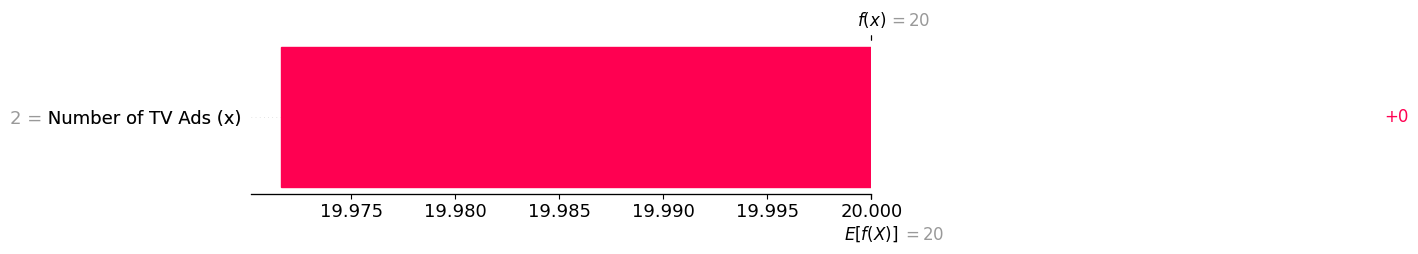

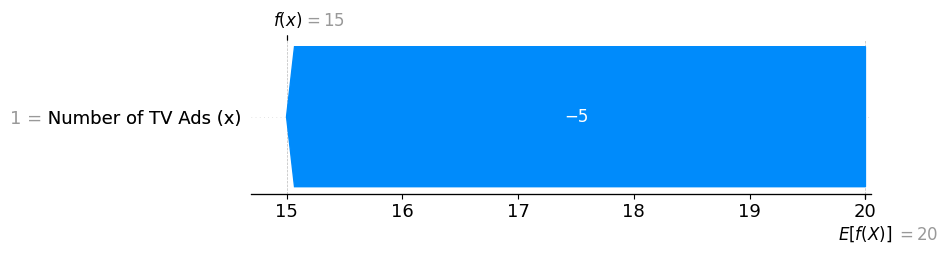

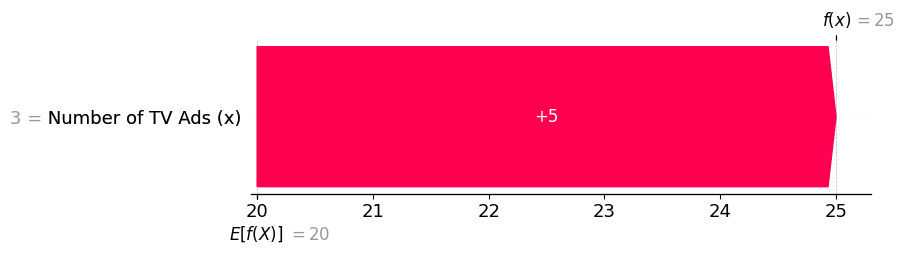

In [ ]:
shap.waterfall_plot(shap_values[0])
shap.waterfall_plot(shap_values[1])
shap.waterfall_plot(shap_values[2])
shap.waterfall_plot(shap_values[3])
shap.waterfall_plot(shap_values[4])

In [ ]:
shap.initjs()
shap.plots.force(shap_values)

5. Analyze and interpret the SHAP values

In [ ]:
for i in range(len(X)):
  print(f"Instance {i+1} - TV Ads: {X.iloc[i,0]}, SHAP value: {shap_values[i].values[0]:.2f}")

Instance 1 - TV Ads: 1, SHAP value: -5.00
Instance 2 - TV Ads: 3, SHAP value: 5.00
Instance 3 - TV Ads: 2, SHAP value: 0.00
Instance 4 - TV Ads: 1, SHAP value: -5.00
Instance 5 - TV Ads: 3, SHAP value: 5.00


# Problem 2

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import shap
data = pd.read_excel("/content/StudyHour.xlsx")
data.columns = data.columns.str.strip()
X = data[['IQ','StudyHours']]
y = data['TestScore']
model = LinearRegression()
model.fit(data[['IQ', 'StudyHours']], y)
coef_iq = model.coef_[0]
coef_hours = model.coef_[1]
intercept = model.intercept_
print(f"Coeff of IQ: {coef_iq:.2f}")
print(f"Coeff of StudyHours: {coef_hours:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"Equation: y = {coef_iq:.2f}*X1 + {coef_hours:.2f}*X2 + {intercept:.2f}")


Coeff of IQ: 0.50
Coeff of StudyHours: 0.50
Intercept: 20.00
Equation: y = 0.50*X1 + 0.50*X2 + 20.00


In [ ]:
# Input values
iq = 95
study_hours = 25

predicted_score = model.predict([[iq, study_hours]])
print(f"Predicted Test Score: {predicted_score[0]:.2f}")


Predicted Test Score: 80.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap_values

.values =
array([[  5.,  10.],
       [ 10.,   5.],
       [  0.,   0.],
       [ -5., -10.],
       [-10.,  -5.]])

.base_values =
array([80., 80., 80., 80., 80.])

.data =
array([[110,  40],
       [120,  30],
       [100,  20],
       [ 90,   0],
       [ 80,  10]])

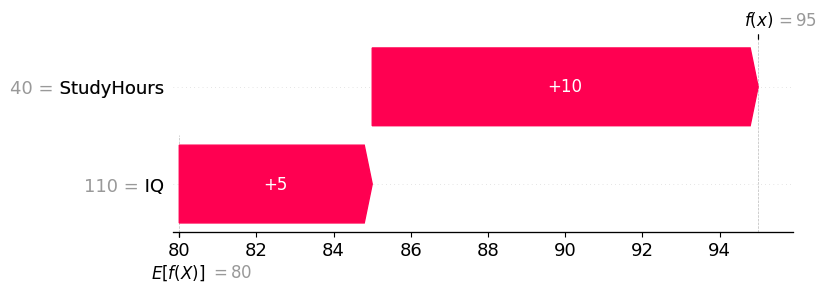

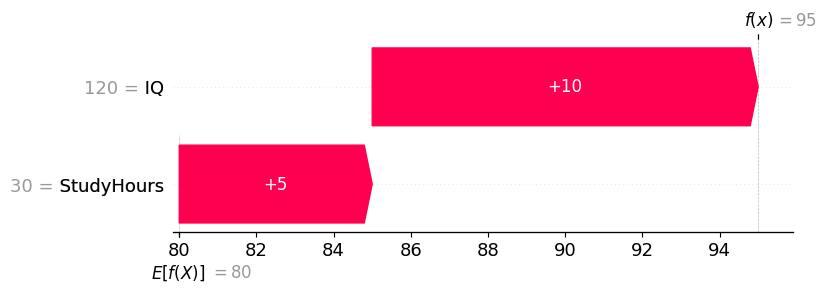

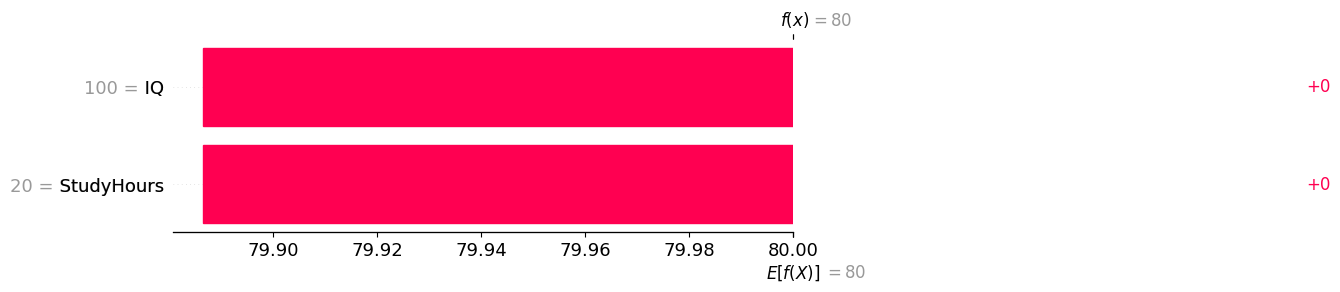

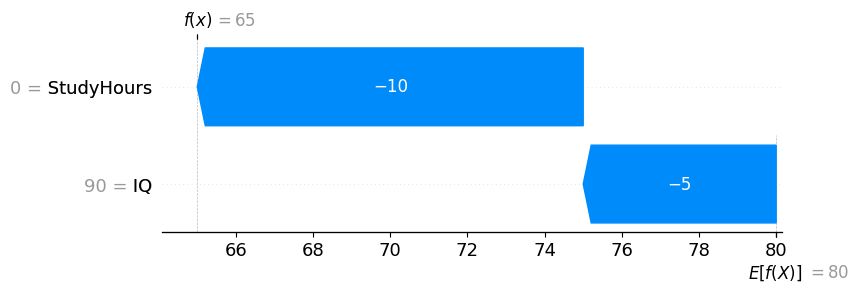

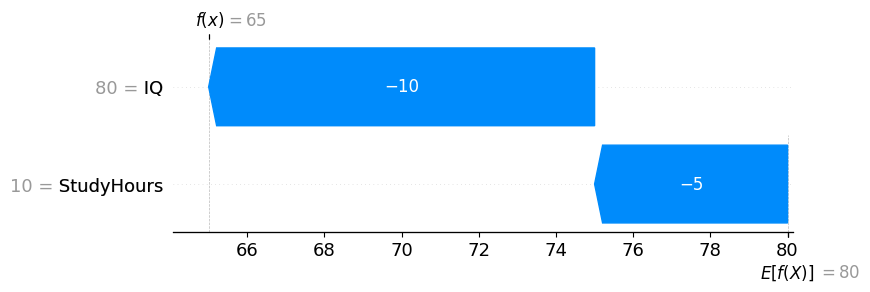

In [ ]:
shap.waterfall_plot(shap_values[0])
shap.waterfall_plot(shap_values[1])
shap.waterfall_plot(shap_values[2])
shap.waterfall_plot(shap_values[3])
shap.waterfall_plot(shap_values[4])

In [ ]:
shap.initjs()
shap.plots.force(shap_values)

In [ ]:
for i in range(len(X)):
  print(f"Instance {i+1} - IQ: {X.iloc[i,0]}, SHAP value: {shap_values[i].values[0]:.2f}")
  print(f"Instance {i+1} - StudyHours: {X.iloc[i,1]}, SHAP value: {shap_values[i].values[1]:.2f}")

Instance 1 - IQ: 110, SHAP value: 5.00
Instance 1 - StudyHours: 40, SHAP value: 10.00
Instance 2 - IQ: 120, SHAP value: 10.00
Instance 2 - StudyHours: 30, SHAP value: 5.00
Instance 3 - IQ: 100, SHAP value: 0.00
Instance 3 - StudyHours: 20, SHAP value: 0.00
Instance 4 - IQ: 90, SHAP value: -5.00
Instance 4 - StudyHours: 0, SHAP value: -10.00
Instance 5 - IQ: 80, SHAP value: -10.00
Instance 5 - StudyHours: 10, SHAP value: -5.00


# Problem 3

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import shap
data=pd.read_csv(r"/content/Experience_Salary.csv")
X=data[["YearsExperience"]]
y=data["Salary"]
model=LinearRegression()
model.fit(X,y)
slope=model.coef_[0]
intercept=model.intercept_
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"Equation of the linear model: y = {slope:.2f}x + {intercept:.2f}")

Slope: 9449.96
Intercept: 25792.20
Equation of the linear model: y = 9449.96x + 25792.20


In [ ]:
#input values
x1=3.5
predicted_score=model.predict([[x1]])
print(f"Predicted Salary of a person with 3.5 years of experience: {predicted_score[0]:.2f}")
x2=7
predicted_score=model.predict([[x2]])
print(f"Predicted Salary of a person with 7 years of experience: {predicted_score[0]:.2f}")

Predicted Salary of a person with 3.5 years of experience: 58867.07
Predicted Salary of a person with 7 years of experience: 91941.94


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
explainer = shap.Explainer(model, X)
shap_values= explainer(X)
shap_values

.values =
array([[-39815.84124773],
       [-37925.84878344],
       [-36035.85631915],
       [-31310.87515842],
       [-29420.88269413],
       [-22805.90906911],
       [-21860.91283697],
       [-19970.92037268],
       [-19970.92037268],
       [-15245.93921195],
       [-13355.94674766],
       [-12410.95051551],
       [-12410.95051551],
       [-11465.95428337],
       [ -7685.96935478],
       [ -3905.9844262 ],
       [ -2015.99196191],
       [  -125.99949762],
       [  5543.97789525],
       [  6488.9741274 ],
       [ 14048.94398456],
       [ 16883.932681  ],
       [ 24443.90253816],
       [ 27278.8912346 ],
       [ 32003.87239533],
       [ 34838.86109176],
       [ 39563.84225249],
       [ 40508.83848464],
       [ 47123.81210966],
       [ 49013.80457395]])

.base_values =
array([76003., 76003., 76003., 76003., 76003., 76003., 76003., 76003.,
       76003., 76003., 76003., 76003., 76003., 76003., 76003., 76003.,
       76003., 76003., 76003., 76003., 76003., 7600

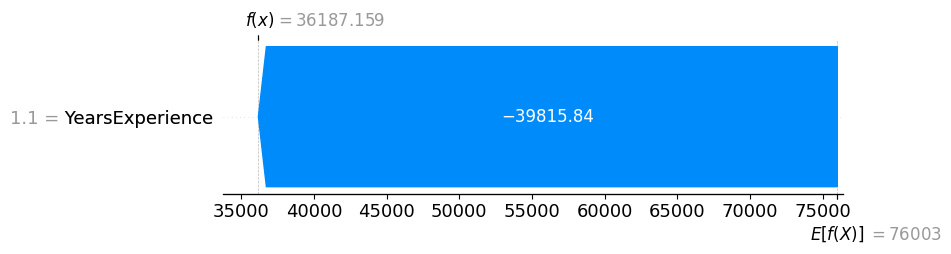

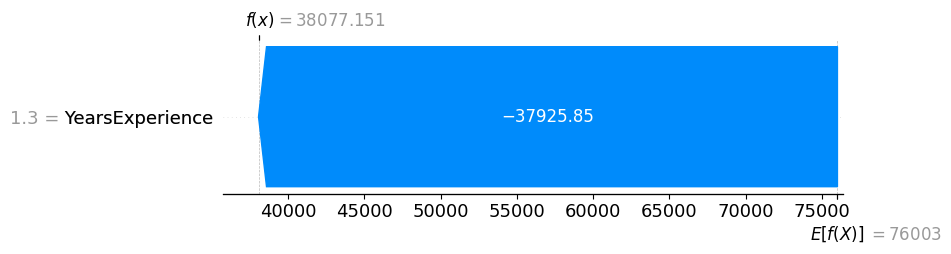

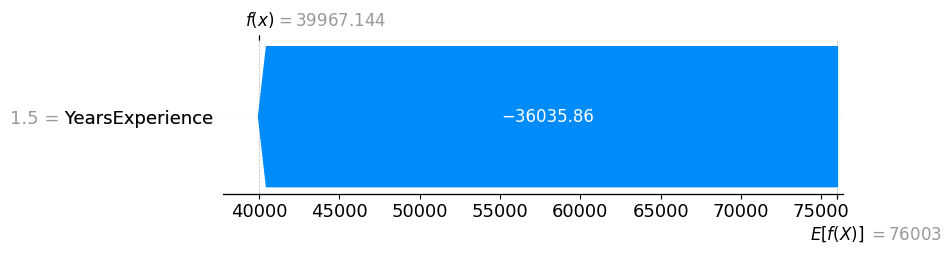

In [ ]:
shap.waterfall_plot(shap_values[0])
shap.waterfall_plot(shap_values[1])
shap.waterfall_plot(shap_values[2])

In [ ]:
shap.initjs()
shap.plots.force(shap_values)

In [ ]:
for i in range(len(X)):
  print(f"Instance {i+1} - YearsExperience: {X.iloc[i,0]}, SHAP value: {shap_values[i].values[0]:.2f}")

Instance 1 - YearsExperience: 1.1, SHAP value: -39815.84
Instance 2 - YearsExperience: 1.3, SHAP value: -37925.85
Instance 3 - YearsExperience: 1.5, SHAP value: -36035.86
Instance 4 - YearsExperience: 2.0, SHAP value: -31310.88
Instance 5 - YearsExperience: 2.2, SHAP value: -29420.88
Instance 6 - YearsExperience: 2.9, SHAP value: -22805.91
Instance 7 - YearsExperience: 3.0, SHAP value: -21860.91
Instance 8 - YearsExperience: 3.2, SHAP value: -19970.92
Instance 9 - YearsExperience: 3.2, SHAP value: -19970.92
Instance 10 - YearsExperience: 3.7, SHAP value: -15245.94
Instance 11 - YearsExperience: 3.9, SHAP value: -13355.95
Instance 12 - YearsExperience: 4.0, SHAP value: -12410.95
Instance 13 - YearsExperience: 4.0, SHAP value: -12410.95
Instance 14 - YearsExperience: 4.1, SHAP value: -11465.95
Instance 15 - YearsExperience: 4.5, SHAP value: -7685.97
Instance 16 - YearsExperience: 4.9, SHAP value: -3905.98
Instance 17 - YearsExperience: 5.1, SHAP value: -2015.99
Instance 18 - YearsExperie

# Problem 4

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import shap
data = pd.read_excel("/content/Int_Ext.xlsx")
data = data.dropna(subset=['Int', 'Ext', 'sal'])
X = data[['Int', 'Ext']]
y = data['sal']
model = LinearRegression()
model.fit(X, y)
coef_iq = model.coef_[0]
coef_hours = model.coef_[1]
intercept = model.intercept_
print(f"Coefficient for Intelligence : {coef_iq:.2f}")
print(f"Coefficient for Extroversion: {coef_hours:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"Equation: y = {coef_iq:.2f}*X1 + {coef_hours:.2f}*X2 + {intercept:.2f}")

Coefficient for Intelligence : 8.22
Coefficient for Extroversion: 49.71
Intercept: 993.92
Equation: y = 8.22*X1 + 49.71*X2 + 993.92


In [ ]:
# Input values
Int1 = 100
Ext1 = 25
predicted_score = model.predict([[Int1, Ext1]])
print(f"Predicted Test Score: {predicted_score[0]:.2f}")
Int2= 120
Ext2= 18
predicted_score = model.predict([[Int2, Ext2]])
print(f"Predicted Test Score: {predicted_score[0]:.2f}")


Predicted Test Score: 3058.63
Predicted Test Score: 2875.07


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap_values

.values =
array([[-133.57356854,  -77.04838355],
       [-100.6939209 ,   72.07752009],
       [-117.13374472,  -77.04838355],
       [ 137.68352449,   22.36888555],
       [  80.14414112,  221.20342373],
       [ -43.15453753, -226.17428718],
       [ -59.59436135, -176.46565264],
       [  -2.05497798, -325.59155627],
       [  55.48440539,   22.36888555],
       [  30.82466966,  270.91205827],
       [ 203.44281977, -126.75701809],
       [ -10.27488989,  121.78615464],
       [ -10.27488989, -126.75701809],
       [  47.26449348,  171.49478918],
       [ -67.81427326,  270.91205827],
       [  80.14414112,  320.62069282],
       [  63.7043173 ,  121.78615464],
       [-141.79348045,   22.36888555],
       [  22.60475775, -176.46565264],
       [ -34.93462562, -325.59155627],
       [   0.        ,    0.        ]])

.base_values =
array([2980., 2980., 2980., 2980., 2980., 2980., 2980., 2980., 2980.,
       2980., 2980., 2980., 2980., 2980., 2980., 2980., 2980., 2980.,
       2980., 

In [ ]:
for i in range(len(X)):
  print(f"Instance {i+1} - Int: {X.iloc[i,0]}, SHAP value: {shap_values[i].values[0]:.2f}")
  print(f"Instance {i+1} - Ext: {X.iloc[i,1]}, SHAP value: {shap_values[i].values[1]:.2f}")

Instance 1 - Int: 89.0, SHAP value: -133.57
Instance 1 - Ext: 21.0, SHAP value: -77.05
Instance 2 - Int: 93.0, SHAP value: -100.69
Instance 2 - Ext: 24.0, SHAP value: 72.08
Instance 3 - Int: 91.0, SHAP value: -117.13
Instance 3 - Ext: 21.0, SHAP value: -77.05
Instance 4 - Int: 122.0, SHAP value: 137.68
Instance 4 - Ext: 23.0, SHAP value: 22.37
Instance 5 - Int: 115.0, SHAP value: 80.14
Instance 5 - Ext: 27.0, SHAP value: 221.20
Instance 6 - Int: 100.0, SHAP value: -43.15
Instance 6 - Ext: 18.0, SHAP value: -226.17
Instance 7 - Int: 98.0, SHAP value: -59.59
Instance 7 - Ext: 19.0, SHAP value: -176.47
Instance 8 - Int: 105.0, SHAP value: -2.05
Instance 8 - Ext: 16.0, SHAP value: -325.59
Instance 9 - Int: 112.0, SHAP value: 55.48
Instance 9 - Ext: 23.0, SHAP value: 22.37
Instance 10 - Int: 109.0, SHAP value: 30.82
Instance 10 - Ext: 28.0, SHAP value: 270.91
Instance 11 - Int: 130.0, SHAP value: 203.44
Instance 11 - Ext: 20.0, SHAP value: -126.76
Instance 12 - Int: 104.0, SHAP value: -10.2

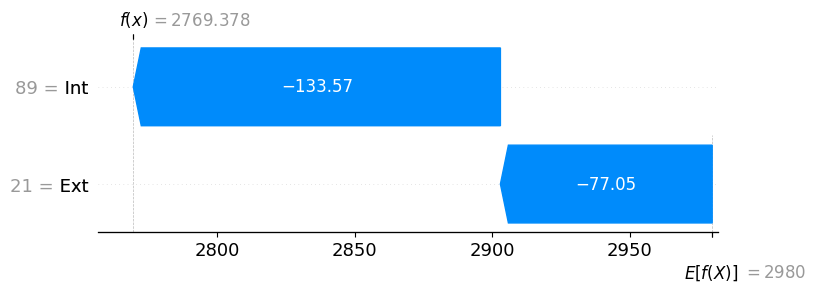

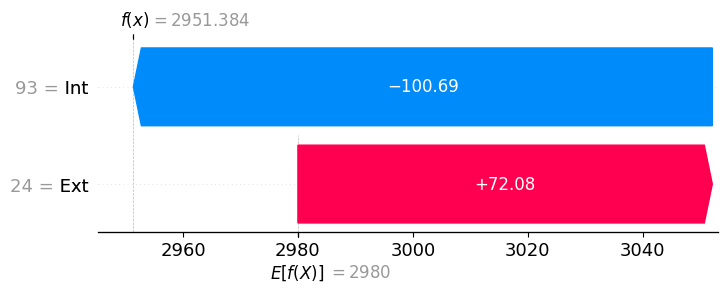

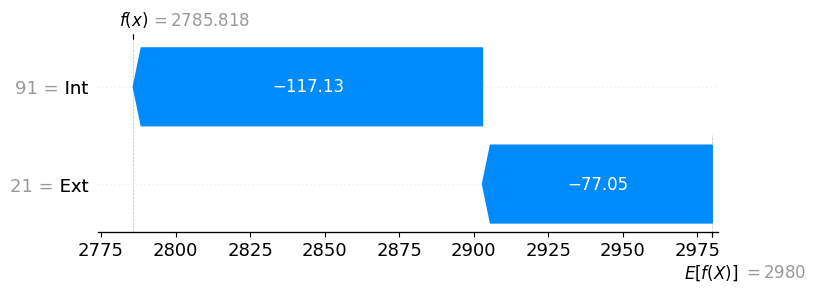

In [ ]:
shap.waterfall_plot(shap_values[0])
shap.waterfall_plot(shap_values[1])
shap.waterfall_plot(shap_values[2])

In [ ]:
shap.initjs()
shap.plots.force(shap_values)

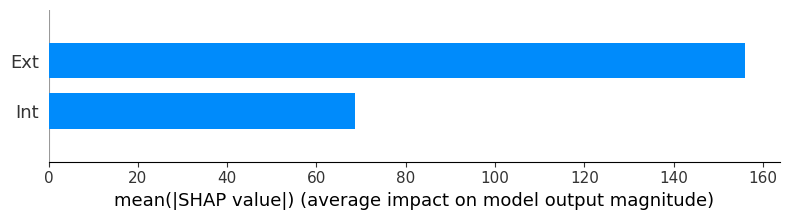

In [ ]:
summaray_plot = shap.summary_plot(shap_values, X, plot_type='bar')

# Problem 5

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import shap
data = pd.read_excel("/content/Marketing_Dataset.xlsx")
data = data.dropna(subset=['facebook', 'newspaper', 'sales'])
X = data[['facebook', 'newspaper']]
y = data['sales']
model = LinearRegression()
model.fit(X, y)
coef_iq = model.coef_[0]
coef_hours = model.coef_[1]
intercept = model.intercept_
print(f"Coefficient for Facebook : {coef_iq:.2f}")
print(f"Coefficient for Newspaper : {coef_hours:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"Equation: y = {coef_iq:.2f}*X1 + {coef_hours:.2f}*X2 + {intercept:.2f}")

Coefficient for Facebook : 0.20
Coefficient for Newspaper : 0.01
Intercept: 11.00
Equation: y = 0.20*X1 + 0.01*X2 + 11.00


In [ ]:
#input values
facebook1=50
newspaper1=70
predicted_score=model.predict([[facebook1,newspaper1]])
print(f"Predicted Sales: {predicted_score[0]:.2f}")
facebook2=25
newspaper2=30
predicted_score=model.predict([[facebook2,newspaper2]])
print(f"Predicted Sales: {predicted_score[0]:.2f}")

Predicted Sales: 21.44
Predicted Sales: 16.18


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
explainer=shap.Explainer(model,X)
shap_values=explainer(X)
shap_values

.values =
array([[ 3.53899291e+00,  3.12389089e-01],
       [ 3.89762616e+00,  1.11915716e-01],
       [ 5.47561246e+00,  3.13220929e-01],
       [ 4.37580383e+00,  2.23382239e-01],
       [-2.91640559e+00,  2.22550399e-01],
       [ 6.19287896e+00,  3.60635793e-01],
       [ 2.34354875e+00, -6.77616637e-02],
       [-8.12423856e-01, -1.66750590e-01],
       [-4.99647844e+00, -2.54925601e-01],
       [-4.87693402e+00, -8.68939773e-02],
       [-4.11184976e+00, -6.19387856e-02],
       [ 2.39567011e-01, -2.29970409e-01],
       [ 2.89345306e+00,  2.84938378e-01],
       [-3.68148986e+00, -2.03351538e-01],
       [ 2.36745763e+00,  1.19402274e-01],
       [ 5.90597236e+00,  1.76799214e-01],
       [ 3.25208631e+00,  6.85053284e-01],
       [ 3.96935281e+00,  2.00922566e-01],
       [-5.97243906e-01, -1.11017329e-01],
       [ 2.15658128e-01, -1.04362611e-01],
       [ 1.12419569e+00,  1.80958413e-01],
       [-4.27921194e+00, -6.77616637e-02],
       [-1.69705254e+00,  1.49348504e-01],
 

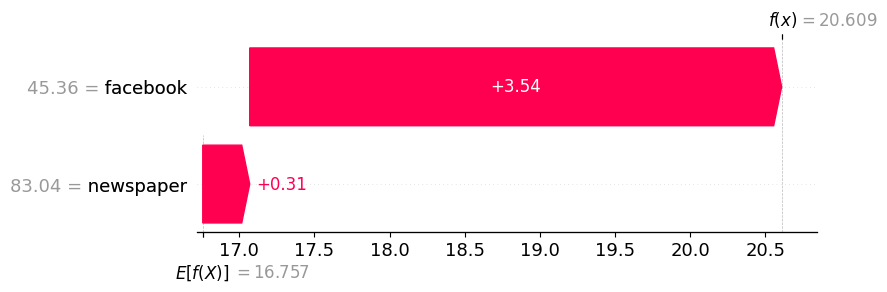

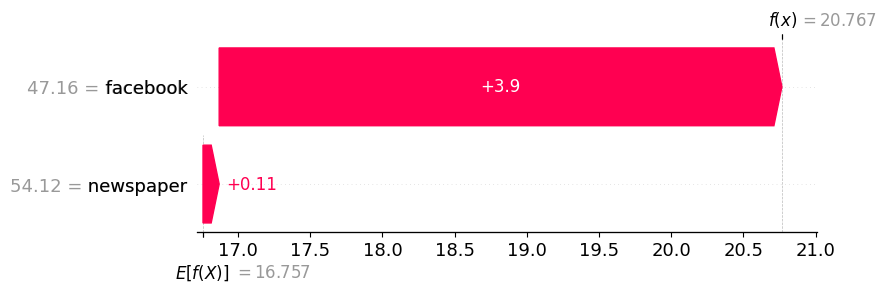

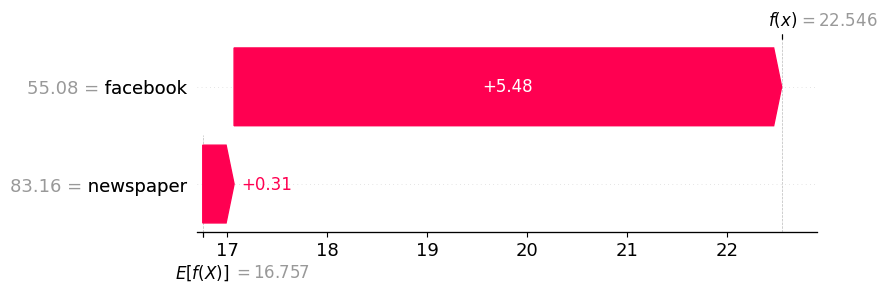

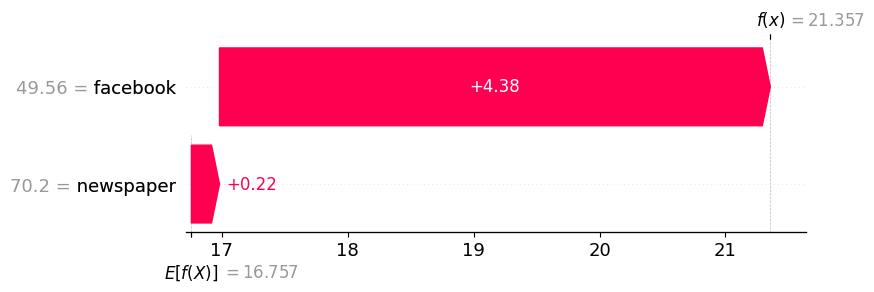

In [ ]:
shap.waterfall_plot(shap_values[0])
shap.waterfall_plot(shap_values[1])
shap.waterfall_plot(shap_values[2])
shap.waterfall_plot(shap_values[3])

In [ ]:
shap.initjs()
shap.plots.force(shap_values)

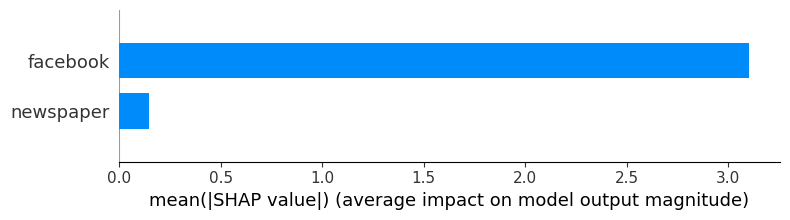

In [ ]:
summaray_plot = shap.summary_plot(shap_values, X, plot_type='bar')

In [ ]:
for i in range(len(X)):
  print(f"Instance {i+1} - Facebook: {X.iloc[i,0]}, SHAP value: {shap_values[i].values[0]:.2f}")
  print(f" Instance {i+1} - Newspaper: {X.iloc[i,1]}, SHAP value: {shap_values[i].values[1]:.2f}")

Instance 1 - Facebook: 45.36, SHAP value: 3.54
 Instance 1 - Newspaper: 83.04, SHAP value: 0.31
Instance 2 - Facebook: 47.16, SHAP value: 3.90
 Instance 2 - Newspaper: 54.12, SHAP value: 0.11
Instance 3 - Facebook: 55.08, SHAP value: 5.48
 Instance 3 - Newspaper: 83.16, SHAP value: 0.31
Instance 4 - Facebook: 49.56, SHAP value: 4.38
 Instance 4 - Newspaper: 70.2, SHAP value: 0.22
Instance 5 - Facebook: 12.96, SHAP value: -2.92
 Instance 5 - Newspaper: 70.08, SHAP value: 0.22
Instance 6 - Facebook: 58.68, SHAP value: 6.19
 Instance 6 - Newspaper: 90.0, SHAP value: 0.36
Instance 7 - Facebook: 39.36, SHAP value: 2.34
 Instance 7 - Newspaper: 28.2, SHAP value: -0.07
Instance 8 - Facebook: 23.52, SHAP value: -0.81
 Instance 8 - Newspaper: 13.92, SHAP value: -0.17
Instance 9 - Facebook: 2.52, SHAP value: -5.00
 Instance 9 - Newspaper: 1.2, SHAP value: -0.25
Instance 10 - Facebook: 3.12, SHAP value: -4.88
 Instance 10 - Newspaper: 25.44, SHAP value: -0.09
Instance 11 - Facebook: 6.96, SHAP va